In [64]:
import theano
from theano import tensor as T
import lasagne
from lasagne.layers import *
from lasagne.init import *
from lasagne.nonlinearities import *
from lasagne.objectives import *
from lasagne.updates import *
import sys
sys.path.append("../../modules/")
import helper as hp
import matplotlib.pyplot as plt
%matplotlib inline
import draw_net
from IPython.display import Image
import numpy as np
reload(draw_net)
from skimage import io
import cPickle as pickle

In [2]:
DATA_DIR = "/Volumes/CB_RESEARCH/dr-data"

In [5]:
y = []
X_left = []
X_right = []
tmp = {}
with open("%s/trainLabels.csv" % DATA_DIR) as f:
    f.readline() # skip header
    for line in f:
        line = line.rstrip().split(",")
        basename = line[0]
        cls = line[1]
        left_of_basename = basename.split("_")[0]
        if left_of_basename not in tmp:
            tmp[left_of_basename] = {"filenames": [], "class": None}
        tmp[left_of_basename]["filenames"].append(basename)
        tmp[left_of_basename]["class"] = int(cls)

In [17]:
for key in tmp:
    X_left.append( tmp[key]["filenames"][0] )
    X_right.append( tmp[key]["filenames"][1] )
    y.append(tmp[key]["class"])

In [67]:
DATA_DIR = "/Volumes/CB_RESEARCH/dr-data/train-trim-ben-r400-512/"

In [39]:
img = hp.load_image("/Volumes/CB_RESEARCH/dr-data/train-trim-ben-r400-512/%s.jpeg" % "16429_left")
img2 = hp.load_image("/Volumes/CB_RESEARCH/dr-data/train-trim-ben-r400-512/%s.jpeg" % "16429_right")
img = np.asarray([img], dtype="float32")
img2 = np.asarray([img2], dtype="float32")

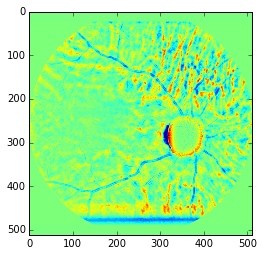

In [36]:
plt.imshow(img[0])

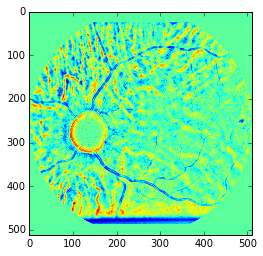

In [37]:
plt.imshow(img2[0])

In [30]:
l_in_left = InputLayer( (None, 3, 512, 512) )
l_in_right = InputLayer( (None, 3, 512, 512) )
# left image
l_topleft_left = SliceLayer( SliceLayer(l_in_left, indices=slice(0,256), axis=2), indices=slice(0,256), axis=3 )
l_bottomleft_left = SliceLayer( SliceLayer(l_in_left, indices=slice(256,512), axis=2), indices=slice(0,256), axis=3 )
l_topright_left = SliceLayer( SliceLayer(l_in_left, indices=slice(0,256), axis=2), indices=slice(256,512), axis=3 )
l_bottomright_left = SliceLayer( SliceLayer(l_in_left, indices=slice(256,512), axis=2), indices=slice(256,512), axis=3 )
# right image
l_topleft_right = SliceLayer( SliceLayer(l_in_right, indices=slice(0,256), axis=2), indices=slice(0,256), axis=3 )
l_bottomleft_right = SliceLayer( SliceLayer(l_in_right, indices=slice(256,512), axis=2), indices=slice(0,256), axis=3 )
l_topright_right = SliceLayer( SliceLayer(l_in_right, indices=slice(0,256), axis=2), indices=slice(256,512), axis=3 )
l_bottomright_right = SliceLayer( SliceLayer(l_in_right, indices=slice(256,512), axis=2), indices=slice(256,512), axis=3 ) 

In [33]:
cuts_left = theano.function(
    [l_in_left.input_var], 
    [get_output(x, l_in_left.input_var) for x in [l_topleft_left, l_bottomleft_left, l_topright_left, l_bottomright_left]]
)

cuts_right = theano.function(
    [l_in_right.input_var], 
    [get_output(x, l_in_right.input_var) for x in [l_topleft_right, l_bottomleft_right, l_topright_right, l_bottomright_right]]
)

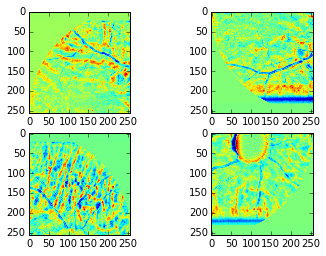

In [55]:
plt.subplot(221)
plt.imshow( cuts_right(img)[0][0][0] )
plt.subplot(222)
plt.imshow( cuts_right(img)[1][0][0] )
plt.subplot(223)
plt.imshow( cuts_right(img)[2][0][0] )
plt.subplot(224)
plt.imshow( cuts_right(img)[3][0][0] )

In [65]:
with open("dr.pkl", "wb") as f:
    pickle.dump((X_left, X_right, y), f, pickle.HIGHEST_PROTOCOL)

In [70]:
hp.load_image("%s/%s.jpeg" % (DATA_DIR, X_left[0])).shape

(3, 512, 512)